# Examen 01, Metodos Computacionales.

Profesor: Hernán Salinas 
La entrega debe ser realizada a través del github, en el directorio [parciales](https://github.com/hernansalinas/Curso_Metodos_Computacionales/tree/main/Entregas/Parciales/Parcial1).


1. (50%) En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

**Solución:**
Reescribiendo la función para igualarla a 0 y reemplazando T, tenemos:

$$ m - \tanh(2m) = 0 $$

[0.5]


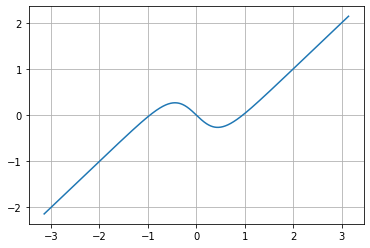

In [13]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy import optimize

# Definamos la función y su derivada primera:

def Mag(m,T):
    return m - np.tanh(m/T)
# Definamos la función que da a T como parámetro

def T_param(t):
    return np.array([t])

T = 0.5

params = T_param(T)
print(params)

# Consideremos ahora la gráfica

m = np.linspace(-np.pi,np.pi,1000)

plt.figure()
plt.plot(m,Mag(m,0.5))
plt.grid()

In [17]:
# Usemos el método de la secante

def sec_met(f,x0,arg):
    m0s = optimize.newton(f,x0,args=arg)
    return m0s

# Intentemos encontrar la raíz positiva, para lo cual:
x0 = 0.5

m0s = sec_met(Mag,x0,params)
print("El valor de la magnetización reducida es {0:.4f}".format(m0s))

El valor de la magnetización reducida es 0.9575


b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

In [18]:
# Para punto fijo usamos el g(x)
# Donde f(x) = x - g(x)

def gMag(m,T):
     return np.tanh(m/T)

# Partamos nuevamente de 0.5
x1 = 0.5
m0p = optimize.fixed_point(gMag,x1,args=params)
print("El valor usando punto fijo es {0:.4f}".format(m0s))

El valor usando punto fijo es 0.9575


d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

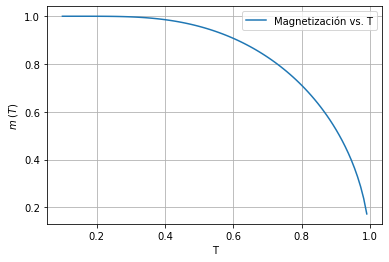

In [28]:
T = np.linspace(0.1,0.99,100)

# Veamos como se comporta la magnetización reducida entre 0 y 1

Vmag = [sec_met(Mag,x0,T_param(i)) for i in T]

plt.figure()
plt.plot(T,Vmag,label='Magnetización vs. T')
plt.xlabel('T')
plt.ylabel(r'$m\ (T)$')
plt.legend()
plt.grid()

*Bonus*, No es necesario hacer el numeral e.

e. Para los 100 puntos anteriores, emplee el metodo de interpolación de lagrange y cubic-spline. Realizar una gráfica mostrando los puntos y el polinomio de interpolación para cada unos de los metodos. ¿Que puede concluir de los metodos?

Nota: 
- Puede emplear las librerias de scipy.

- Para el punto e, realice un subplot, en el  primer gráfico ingrese todo lo relacionado con la interpolación de lagrange y la segunda el metodo de  CubicSpline. Reemplace los valores $x$ y $y$ que deteminó en las lineas plt.plot() del siguiente fragmento de código.

  ```
  # Lagrange
  plt.figure(figsize=(12, 4))
  plt.subplot(121)
  plt.plot(x,y  , label="lagrange")
  plt.xlabel("T",fontsize=14)
  plt.ylabel("m",fontsize=14)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.legend()

  #Cubic Spline
  plt.subplot(122)
  plt.plot(x,y  ,"o-", label="CubicSpline")
  plt.xlabel("T",fontsize=14)
  plt.ylabel("m",fontsize=14)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.legend()

  plt.show()

```

2 (50%) El dataset [Temperature_Bogota_Barcelona](https://github.com/hernansalinas/Curso_Metodos_Computacionales/blob/main/Entregas/Parciales/Parcial1/dataset/Temperature_Bogota_Barcelona.csv)
 contiene información de la temperatura (en grados Fahrenheit) promedio de Bogotá y Barcelona desde el año 1995. Para el presente dataset realizar lo siguiente:

 a. Leer el dataset desde el link sugerido.

In [44]:
import pandas as pd

url = 'https://raw.githubusercontent.com/hernansalinas/Curso_Metodos_Computacionales/main/Entregas/Parciales/Parcial1/dataset/Temperature_Bogota_Barcelona.csv'
TempF = pd.read_csv(url)
TempF

,Unnamed: 0,Year,City,Month,Day,AvgTemperature
0,0,1995,Barcelona,6.526027,15.720548,62.019178
1,1,1995,Bogota,6.526027,15.720548,54.963014
2,2,1996,Barcelona,6.513661,15.756831,61.125956
3,3,1996,Bogota,6.513661,15.756831,55.083333
4,4,1997,Barcelona,6.526027,15.720548,62.612329
5,5,1997,Bogota,6.526027,15.720548,56.231507
6,6,1998,Barcelona,6.526027,15.720548,60.273973
7,7,1998,Bogota,6.526027,15.720548,49.642466
8,8,1999,Barcelona,6.526027,15.720548,61.204658
9,9,1999,Bogota,6.526027,15.720548,52.231781


b. Eliminar las columnas Month,  day y Unnamed

In [46]:
#Verificamos que Temp ya está como tipo DataFrame

print(type(TempF))

# Eliminamos las columnas

Temp = TempF.drop(['Month','Day','Unnamed: 0'],axis='columns')
Temp

<class 'pandas.core.frame.DataFrame'>


,Year,City,AvgTemperature
0,1995,Barcelona,62.019178
1,1995,Bogota,54.963014
2,1996,Barcelona,61.125956
3,1996,Bogota,55.083333
4,1997,Barcelona,62.612329
5,1997,Bogota,56.231507
6,1998,Barcelona,60.273973
7,1998,Bogota,49.642466
8,1999,Barcelona,61.204658
9,1999,Bogota,52.231781


 c. Adicionar una nueva columna AvgTempCelcius con la temperatura en grados celcius. $ C=(F-32)/1.8$

In [52]:
Temp['AvdTempCelcius'] = (Temp['AvgTemperature'] - 32)/1.8
Temp

,Year,City,AvgTemperature,AvdTempCelcius
0,1995,Barcelona,62.019178,16.677321
1,1995,Bogota,54.963014,12.757230
2,1996,Barcelona,61.125956,16.181087
3,1996,Bogota,55.083333,12.824074
4,1997,Barcelona,62.612329,17.006849
5,1997,Bogota,56.231507,13.461948
6,1998,Barcelona,60.273973,15.707763
7,1998,Bogota,49.642466,9.801370
8,1999,Barcelona,61.204658,16.224810
9,1999,Bogota,52.231781,11.239878


 d. Realizar un gráfico de AvgTempCelcius como función del año para la ciudad de Bogotá.

In [75]:
TempBog = Temp[Temp['City']=='Bogota']
TempBog

,Year,City,AvgTemperature,AvdTempCelcius
1,1995,Bogota,54.963014,12.757230
3,1996,Bogota,55.083333,12.824074
5,1997,Bogota,56.231507,13.461948
7,1998,Bogota,49.642466,9.801370
9,1999,Bogota,52.231781,11.239878
11,2000,Bogota,54.918579,12.732544
13,2001,Bogota,55.416164,13.008980
15,2002,Bogota,54.686849,12.603805
17,2003,Bogota,54.973425,12.763014
19,2004,Bogota,55.598087,13.110049


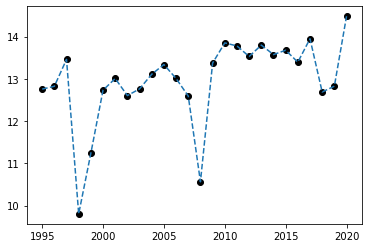

In [76]:
plt.plot(TempBog['Year'],TempBog['AvdTempCelcius'],'--')
plt.scatter(TempBog['Year'],TempBog['AvdTempCelcius'],color='black')

e. Realizar un grafico de AvgTempCelcius como funcion del año para la ciudad de Barcelona.

In [78]:
TempBar = Temp[Temp['City']=='Barcelona']
TempBar

,Year,City,AvgTemperature,AvdTempCelcius
0,1995,Barcelona,62.019178,16.677321
2,1996,Barcelona,61.125956,16.181087
4,1997,Barcelona,62.612329,17.006849
6,1998,Barcelona,60.273973,15.707763
8,1999,Barcelona,61.204658,16.224810
10,2000,Barcelona,60.069399,15.594111
12,2001,Barcelona,59.279452,15.155251
14,2002,Barcelona,58.044110,14.468950
16,2003,Barcelona,63.139452,17.299696
18,2004,Barcelona,62.875137,17.152854


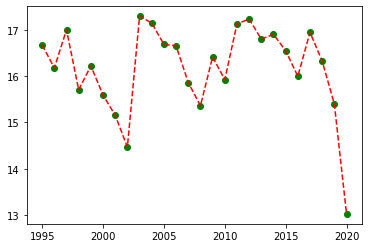

In [77]:
plt.plot(TempBar['Year'],TempBar['AvdTempCelcius'],'--',color='red')
plt.scatter(TempBar['Year'],TempBar['AvdTempCelcius'],color='green')

 f. Realizar interpolacion de Hermite de grado 5 y Cubic Spline con los datos de  la ciudad de Bogotá, comparelos en una misma gráfica

In [88]:
# Definamos las funciones que interpolen los datos

from scipy import interpolate

xBog = TempBog['Year']
yBog = TempBog['AvdTempCelcius']
xBar = TempBar['Year']
yBar = TempBar['AvdTempCelcius']

def hermit(xi,yi,i):
    ph = np.polynomial.hermite.Hermite.fit(xi,yi,i)
    return ph

def lag_int(xn,yn):
    pl = interpolate.lagrange(xn,yn)
    return pl

In [96]:
i = 5
phBog = hermit(xBog,yBog,i)
print("Polinomio con método de Hermit para Bogotá: {}".format(phBog))

phBar = hermit(xBar,yBar,i)
print("\nPolinomio con método de Hermit para Barcelona: {}".format(phBar))

plBar = lag_int(xBar,yBar)
print("Polinomio con método de Lagrange para Barcelona {}".format(plBar))

plBog = lag_int(xBog,yBog)
print("Polinomio con método de Lagrange {}".format(plBog))

Polinomio con método de Hermit para Bogotá: 13.61352011122403 - 0.9378107834938494·H₁(x) + 0.8888307522548694·H₂(x) -
0.5173622063445293·H₃(x) + 0.10559454329552989·H₄(x) -
0.025977921162953995·H₅(x)

Polinomio con método de Hermit para Barcelona: 15.160200571697766 - 7.510368334857063·H₁(x) - 1.4248606924152045·H₂(x) -
2.974305323863404·H₃(x) - 0.143860001203719·H₄(x) -
0.16905860637603504·H₅(x)


KeyError: 1

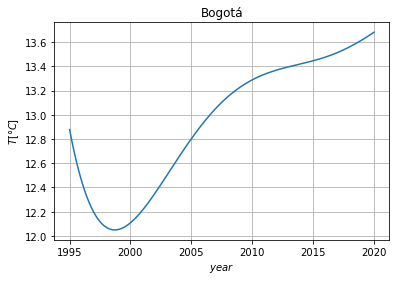

In [97]:
# Grafiquemos las funciones interpoladas

years = np.linspace(1995,2020,500)

plt.figure()
plt.title('Bogotá')
plt.plot(years, phBog(years))
plt.xlabel("$year$")
plt.ylabel(r"$T [°C]$")
plt.grid()

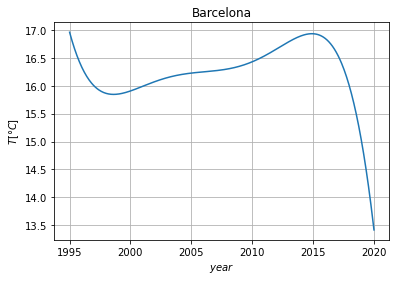

In [98]:
plt.figure()
plt.title('Barcelona')
plt.plot(years, phBar(years))
plt.xlabel("$year$")
plt.ylabel(r"$T [°C]$")
plt.grid()

 g. Determinar el valor mínimo de temperatura empleando el metodo de fmin powell.

Referencia: 
- Dataset tomado y modificado de : https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities